# Tarea 4 - Compilación de problemas Módulo 1 - Optimización. 
Lea cuidadosamente las siguientes **indicaciones** antes de comenzar la tarea:
- Para resolver la tarea edite este mismo archivo y renómbrelo de la siguiente manera: *E1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *E1_JaramilloZuluaga*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo.
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.

<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Isabela Torres- Septien Uribe

**Fecha:** 26 de septiembre del 2023.

**Expediente** : 730667
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea 4: Clase 10
  

## Primer punto. Optimización de funciones escalares usando `sympy` (30 puntos).

**Enunciado.** 

El telescopio espacial Hubble fue puesto en operación el 24 de abril de 1990 por el trasbordador espacial Discovery. Un modelo para la velocidad del trasbordador durante su misión desde el lanzamiento en $t=0$ hasta que los cohetes auxiliares de combustible sólido se desprenden en el instante $t=126$ , está dado por 

$$v(t) =  0.001302t^3 - 0.09029t^2+23.61t - 3.083$$

(en pies por segundo). Usando este modelo, estime los valores máximo y mínimo absolutos de la aceleración del trasbordador entre el lanzamiento y el desprendimiento de los cohetes auxiliares de combustible sólido. **NOTA: Recuerde que la fórmula de la aceleración es:**

$$a=\frac{dv}{dt}$$

**Punto 1 (15 puntos).** Usando `sympy` encontrar la expresión para la aceleración y los puntos críticos de la misma.

**Solución punto 1.**

In [92]:
import sympy as sp

In [93]:
#resolvemos
t = sp.symbols('t')

vt = 0.001302*t**3 - 0.09029*t**2 + 23.61*t - 3.083 

#derivamos
at = sp.diff(vt,t)

#Sacamos los puntos criticos
pc = sp.solve(at,t)

In [94]:
print("Aceleración", at)
print("Puntos criticos",pc)

Aceleración 0.003906*t**2 - 0.18058*t + 23.61
Puntos criticos [23.115719406042 - 74.2307912347673*I, 23.115719406042 + 74.2307912347673*I]


**Punto 2 (5 puntos).** Evaluar los puntos críticos y extremos del intervalo y concluir cuáles son la acelaración máxima y mínima, respectivamente y en qué instante de tiempo se presentan.

**Solución punto 2**

In [95]:
t = sp.symbols('t')

v = 0.001302*t**3 - 0.09029*t**2 + 23.61*t - 3.083 

#derivamos
a = sp.diff(v,t)

#Sacamos los puntos criticos
pc = sp.solve(a,t)

#Aceleración en 0 y 126
A_en_0 = a.subs(t,0)
A_en_126 = a.subs(t,126)
A_en_pc = a.subs(t,pc[0])

#Resultados
print("Aceleracion en 0 =",A_en_0)
print("Aceleracion en 126 =",A_en_126)
print("Aceleracion en puntos criiticos =",A_en_pc)      


Aceleracion en 0 = 23.6100000000000
Aceleracion en 126 = 62.8685760000000
Aceleracion en puntos criiticos = 19.4357633896569 + 0.003906*(23.115719406042 - 74.2307912347673*I)**2 + 13.4045962811743*I


**Punto 3 (10 puntos).** Graficar la aceleración respecto al tiempo junto con los puntos máximos y mínimos encontrados en el punto anterior.

**Solución punto 3.**

In [ ]:
import mathplotlib.pyplot as plt
import numpy as np

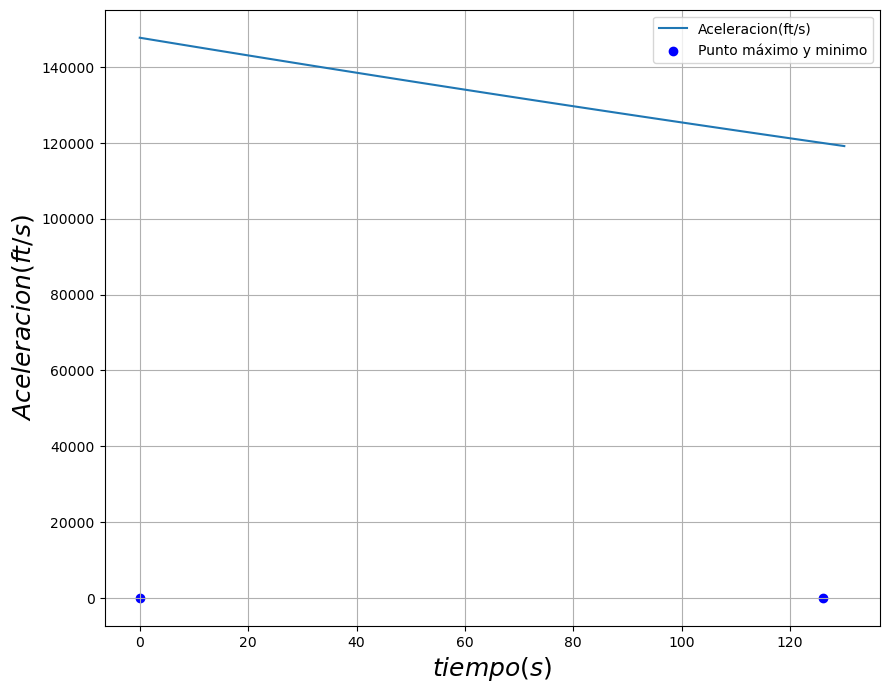

In [96]:
#definir funcion
def aceleracion(t):
    return 0.003906*t**2 - 0.1805*t + 23.61

t_max = 126
t_min = 0

a_max = 62.86
a_min = 23.61

tnum = np.linspace(0,130,100)
anum = f(tnum)

# Crear el tamaño de la figura a graficar
plt.figure(figsize=(10,8))

#Agregar los gráficos
plt.plot(tnum,anum,label='Aceleracion(ft/s)')
plt.scatter([t_max, t_min],[a_max,a_min],color ='blue',label='Punto máximo y minimo')


#Nombrar los ejes de la gráfica
plt.xlabel('$tiempo(s)$',fontsize=18)
plt.ylabel('$Aceleracion(ft/s)$',fontsize=18)

plt.grid(True)
plt.legend()
plt.show()


## Segundo punto. Programación lineal (35 puntos).

**Enunciado.** 

Como gerente de una asociación de empresas para el reciclaje en la región, ha sido asignado para tomar la decisión de a quien debe venderse unos desperdicios de metal que fueron recolectados. Dos empresas: Metales Ltda. y Hierros Unidos, están interesados en la compra de los desperdicios. La primera empresa, que paga la tonelada de metal a: $\$500$ no esta interesada en comprar mas de $500$ $toneladas$., en cambio la segunda, que esta dispuesta a pagar $\$400$ por tonelada de metal, ofrece comprar un límite máximo de $600$ $toneladas$. Sin embargo la financiación local ha limitado las compras formulando la siguiente condición: La cantidad de desperdicio vendida a la empresa Metales Ltda, NO puede superar el doble de la cantidad vendida a Hierros Unidos.

Conociendo que la asociación de empresas dispone de 1.000 toneladas de desperdicios metálicos, formule un modelo de programación lineal que permita alcanzar la mejor decisión para el gerente para obtener la mayor ganancia.

*Variables de decisión*: 

$x_1$ = Cantidad de toneladas de desperdicios a vender a Metales Ltda.

$x_2$ = Cantidad de toneladas de desperdicios a vender a Hierros Unidos.

**Punto 1 (20 puntos).** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

**Solución punto 1.**

**Función Objetivo**

$min c^{t}x = [-500,-400]*[x_{1},x_{2}] = - 500x_{1}-400x_{2}$

**Restricciones**

$ Aeqx = beq\Rightarrow  [1,1]*[x_{1},x_{2}] = x_{1} + x_{2} = 1000$

**Limites**

$Ax = b\Rightarrow  [1,0]*[x_{1},x_{2}] \leq  500$

$Ax = b\Rightarrow  [0,1]*[x_{1},x_{2}] \leq  600$

$Ax = b\Rightarrow  [1,-2]*[x_{1},x_{2}] \leq  0$

**Punto 2 (15 puntos).** Resuelva el problema utilizando la función `linprog`. ¿Cuántos toneladas hay que vender a cada empresa?

**Solución punto 2.**

In [97]:
import numpy as np
import scipy.optimize as opt
from scipy.optimize import linprog

In [98]:
c = np.array([-500,-400])
b = np.array([500,600,0])
A = np.array([[1,0],
            [0,1],
            [1,-2]])
beq = np.array([1000])
Aeq = np.array([[1, 1]])
bounds = [(0, None), (0, None)]

In [99]:
#Resolver
resultado = opt.linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=bounds)

In [100]:
#solucion
resultado

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -450000.0
              x: [ 5.000e+02  5.000e+02]
            nit: 0
          lower:  residual: [ 5.000e+02  5.000e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-4.000e+02]
        ineqlin:  residual: [ 0.000e+00  1.000e+02  5.000e+02]
                 marginals: [-1.000e+02 -0.000e+00 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

CONCLUSIÓN
Se necesita vender 500 toneladas de desperdicios a vender a Metales Lta.
Y 500 toneladas de desperdicios a vender a Hierros Unidos.

## Tercer punto. Ajuste de curvas (35 puntos).

**Enunciado**. El archivo `population_urban.csv` contiene información histórica anual de México relativa a el % de población urbana.

**Punto 1 (10 puntos).** Importar los datos en un DataFrame de pandas.

**Solución punto 1.**

In [34]:
import pandas as pd

In [35]:
pd.read_csv("population_urban.csv")

,Year,Urban population (% of total)
0,1960,50.753
1,1961,51.590
2,1962,52.428
3,1963,53.265
4,1964,54.100
5,1965,54.931
6,1966,55.761
7,1967,56.587
8,1968,57.411
9,1969,58.229


**Punto 2 (15 puntos).** Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

**En caso de ser necesario, aplique el escalado de características usando el método de normalización**

Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

**Solución punto 2.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [5]:
opt.minimize

<function scipy.optimize._minimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)>

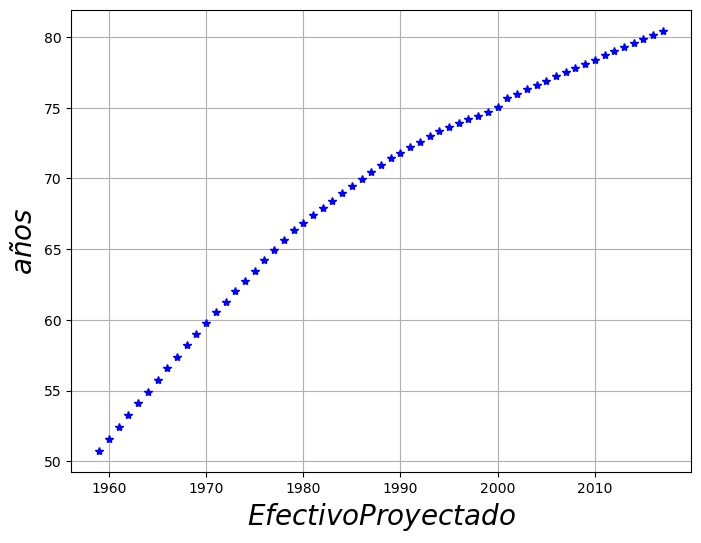

In [9]:
x = np.arange(1959,2018)
y = np.array([50.753,51.59,52.428,53.265,54.1,54.931,55.761,56.587,57.411,58.229,59.021,59.779,60.532,61.279,62.022,62.759,63.491,64.215,64.934,65.646,66.339,66.87,67.396,67.919,68.437,68.95,69.459,69.963,70.462,70.956,71.419,71.816,72.209,72.598,72.985,73.368,73.67,73.929,74.186,74.441,74.722,75.045,75.682,75.997,76.308,76.616,76.92,77.222,77.52,77.815,78.111,78.405,78.699,78.993,79.285,79.577,79.867,80.156,80.444])

#Graficamos los puntos
plt.figure(figsize=(8,6))
plt.plot(x,y,'*b')

plt.xlabel('$POBLACION URBANA$',fontsize=20)
plt.ylabel('$Años$',fontsize=20)

plt.grid()
plt.show()

In [38]:
min_x1, min_y1 = min(x), min(y)
max_x1, max_y1 = max(x), max(y)

x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

In [15]:
# Definir funcion objetivo y condición inicial (semilla)
def obj1(beta,x,y):
    yhat = beta[1]*x + beta[0]
    error = y-yhat
    return np.sum(error**2)

beta_inicial = -np.zeros(2)   #[0,0]

In [16]:
# Resolver
sol1 = opt.minimize(obj1,beta_inicial,args=(x_norm,y_norm))
sol1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.19654788918446087
        x: [ 1.277e-01  9.652e-01]
      nit: 7
      jac: [-2.608e-08 -1.676e-08]
 hess_inv: [[ 3.307e-02 -4.921e-02]
            [-4.921e-02  9.849e-02]]
     nfev: 24
     njev: 8

In [17]:
def obj2(beta,x,y):
    yhat = beta[2]*x**2 + beta[1]*x + beta[0]
    error = y - yhat
    return np.sum(error**2)

beta_inicial = -np.zeros(3)

In [18]:
sol2 = opt.minimize(obj2,beta_inicial,args=(x_norm,y_norm))
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0075534369595677085
        x: [ 7.395e-03  1.700e+00 -7.343e-01]
      nit: 8
      jac: [-3.478e-06 -5.540e-07 -7.539e-07]
 hess_inv: [[ 7.079e-02 -2.804e-01  2.315e-01]
            [-2.804e-01  1.514e+00 -1.417e+00]
            [ 2.315e-01 -1.417e+00  1.418e+00]]
     nfev: 40
     njev: 10

In [19]:
beta2 = sol2.x
beta2  

array([ 0.00739535,  1.69954351, -0.73434386])

In [20]:
def obj3(beta,x,y):
    yhat = beta.dot([x**i for i in range(4)])
    error = y-yhat
    return np.sum(error**2)

beta_inicial = -np.zeros(4)

In [21]:
sol3 = opt.minimize(obj3,beta_inicial,args=(x_norm,y_norm))
sol3

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.0020138716026479194
        x: [-1.576e-02  1.990e+00 -1.467e+00  4.881e-01]
      nit: 12
      jac: [-7.784e-07 -5.232e-07 -9.511e-07  7.360e-07]
 hess_inv: [[ 1.172e-01 -8.564e-01  1.681e+00 -9.655e-01]
            [-8.564e-01  8.728e+00 -1.961e+01  1.213e+01]
            [ 1.681e+00 -1.961e+01  4.732e+01 -3.061e+01]
            [-9.655e-01  1.213e+01 -3.061e+01  2.042e+01]]
     nfev: 70
     njev: 14

In [22]:
beta3 = sol3.x
beta3

array([-0.01576279,  1.9899211 , -1.466528  ,  0.48812296])

In [44]:
def obj5(beta,x,y):
    yhat = beta.dot([x**i for i in range(6)])
    error = y - yhat
    return np.sum(error**2)

beta_inicial = -np.zeros(6)

In [45]:
sol5 = opt.minimize(obj5,beta_inicial,args=(x_norm,y_norm))
sol5

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.00039014623993097587
        x: [ 2.774e-03  1.497e+00  1.464e+00 -6.165e+00  6.423e+00
            -2.222e+00]
      nit: 39
      jac: [ 9.586e-08  5.281e-07 -1.281e-06  3.515e-07  1.600e-06
            -1.737e-06]
 hess_inv: [[ 2.175e-01 -3.625e+00 ...  3.873e+01 -1.377e+01]
            [-3.625e+00  8.762e+01 ... -1.252e+03  4.632e+02]
            ...
            [ 3.873e+01 -1.252e+03 ...  2.564e+04 -1.011e+04]
            [-1.377e+01  4.632e+02 ... -1.011e+04  4.038e+03]]
     nfev: 308
     njev: 44

In [46]:
beta5 = sol5.x
beta5

array([ 2.77431297e-03,  1.49672078e+00,  1.46400814e+00, -6.16450146e+00,
        6.42250318e+00, -2.22198642e+00])

[]

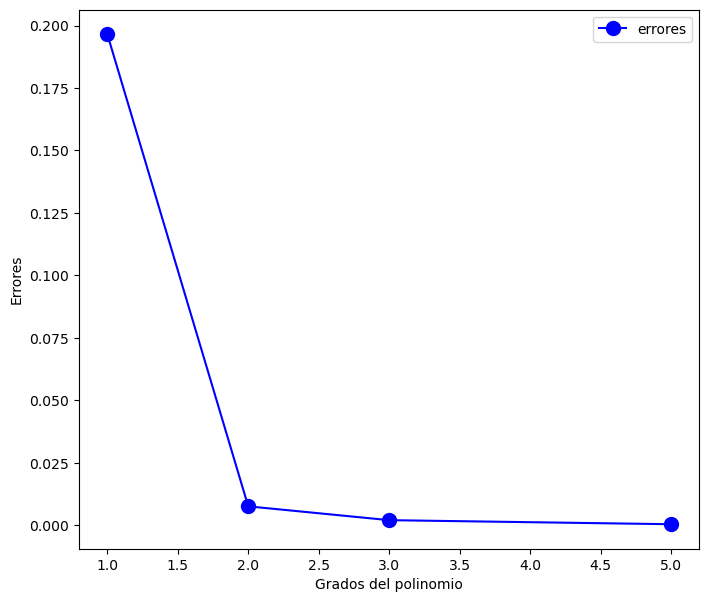

In [47]:
e = [sol1.fun, sol2.fun, sol3.fun, sol5.fun]
grados = [1, 2,3,5]
plt.figure(figsize=(8,7))
plt.plot(grados, e, 'ob-', ms=10, label='errores')
plt.legend()
plt.xlabel('Grados del polinomio', fontsize=10)
plt.ylabel('Errores', fontsize=10)
plt.plot()

In [74]:
def objn_ridge(beta, x, y, n):
    l = 0.01
    yhat = beta.dot([x**i for i in range(n + 1)])
    error = y - yhat
    return np.sum(error**2) + l * np.linalg.norm(beta, 2)**2

n = 3
beta_inicial = -np.zeros(n + 1)

In [75]:
sol3_ridge = opt.minimize(objn_ridge, beta_inicial, args=(x_norm,y_norm, n))
sol3_ridge

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.03897612064100989
        x: [ 2.514e-02  1.553e+00 -4.608e-01 -1.441e-01]
      nit: 10
      jac: [ 6.640e-07  8.889e-07 -1.406e-07  3.297e-07]
 hess_inv: [[ 8.070e-02 -4.374e-01  6.756e-01 -3.168e-01]
            [-4.374e-01  3.873e+00 -7.900e+00  4.548e+00]
            [ 6.756e-01 -7.900e+00  1.900e+01 -1.225e+01]
            [-3.168e-01  4.548e+00 -1.225e+01  8.498e+00]]
     nfev: 60
     njev: 12

In [76]:
sol3.x

array([-0.01576279,  1.9899211 , -1.466528  ,  0.48812296])

In [77]:
beta3_ridge = sol3_ridge.x
beta3_ridge

array([ 0.02513686,  1.55343675, -0.46084281, -0.14409677])

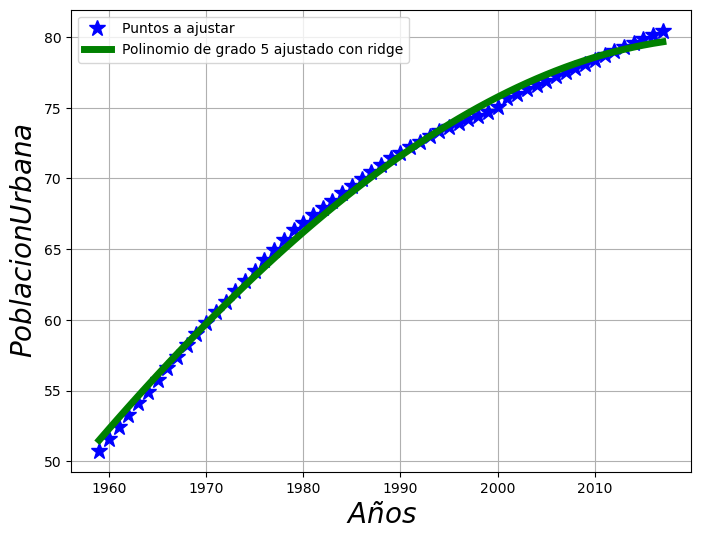

In [81]:
# Graficar
yhat3_ridge = (beta3_ridge.dot([x_norm**i for i in range(4)]))*(max(y)-min(y)) + min(y)   # Para volver a la escala inicial

# Graficar
plt.figure(figsize=(8,6))

#Agregar puntos y línea ajustada
plt.plot(x,y,'*b',ms = 12, label='Puntos a ajustar')

plt.plot(x,yhat3_ridge,'g',lw=5,label='Polinomio de grado 5 ajustado con ridge')

plt.xlabel('$Años$',fontsize=20)
plt.ylabel('$Poblacion Urbana$',fontsize=20)

plt.grid()
plt.legend(loc='best')
plt.show()

**Punto 3 (10 puntos).** Con los polinomios ajustados en el punto anterior, estime la población en el año 2019  y compare con el dato real 80.444%.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

**Solución punto 3.**

In [83]:
def f(x):
    x_norm = (x - min_x1)/(max_x1 - min_x1)
    y_hat = (sol3_ridge.x.dot([x_norm**i for i in range(4)])) *(max_y1 - min_y1) + min_y1
    return y_hat
             
f(np.array([2019]))

array([79.83367458])

**CONCLUSIÓN**

Al momento de sacar la estimación total de la población urbana en 2019 me dio 79.8336 esto, se debe al polinomio de 3er grado que estamos usando ya que, a pesar de tener una minima variación a un polinomio del 5to o 6to grado, si usará estos me daría una respuesta más pegada a 80.444. Aun con esto en mente la diferencia entre uno y otro es de 0.6104 lo cual es minimo.